# Joining Data with Pandas

## Chapter 2 - Merging Tables With Different Join Types

### Left Joins

Left joins return all the rows of data in the left dataset and only the rows in the right table that have a key column matches. 
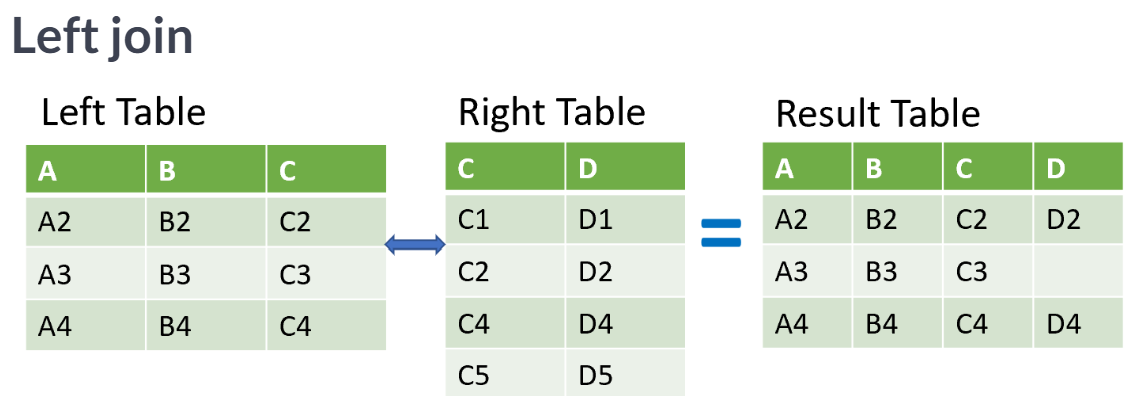

#### Merge with Left Join
Notice that the movies dataset is 4,803 rows, but the tagline dataset has only 3,955 rows. To merge these two datasets to include all of the tagline data, use the same pandas .merge() method, but include the keyword how = and set to 'left'. 

Once merged, the shape of the merged dataset is 4,803 rows, the same size as the left table in the merge statement and any missing data from the right table is filled in with a NaN.

In [94]:
import pandas as pd
import pickle
import os
os.chdir('c:\\datacamp\\data\\')

#load pickle data: movies.p
with open('movies.p', 'rb')as file:
    movies = pickle.load(file)

print(movies.head())
print(movies.shape)

#load pickle data: taglines.p
with open('taglines.p', 'rb') as file:
    taglines = pickle.load(file)

print(taglines.head())
print(taglines.shape)

movie_taglines = movies.merge(taglines, on = 'id', how = 'left')
print(movie_taglines.head())
print(movie_taglines.shape)

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
(4803, 4)
       id                                         tagline
0   19995                     Enter the World of Pandora.
1     285  At the end of the world, the adventure begins.
2  206647                           A Plan No One Escapes
3   49026                                 The Legend Ends
4   49529            Lost in our world, found in another.
(3955, 2)
      id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572   2005-09-23   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12   
2  38365             Grown Ups   38.864027   2010-06-24   
3   9672              Infamous    3.680896   2006-11-16   
4

### Exercise 1

#### Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

The movies and financials tables have been loaded for you.

__Instructions:__
* Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.
* Count the number of rows in movies_financials with a null value in the budget column.

In [206]:
#load pickle data file needed for this exercise: financials.p
with open('financials.p', 'rb') as file:
    financials = pickle.load(file)
financials = financials.set_index('id')
    
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


#### Enriching a dataset
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The toy_story DataFrame contains the Toy Story movies. The toy_story and taglines DataFrames have been loaded for you.

__Instructions:__
* Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag.
* With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag.

In [109]:
#Load data needed for this exercise: toystory.csv
toy_story = pd.read_csv('toystory.csv')

# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on = 'id', how = 'left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)
      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


### Other Joins

#### Right Joins

Beside the inner join and the left join, there is also the right join option for merging Pandas DataSets. In the right join, all the data from the right dataset are included in the results and only the rows in the left table that have a key column matches are included in the results. 
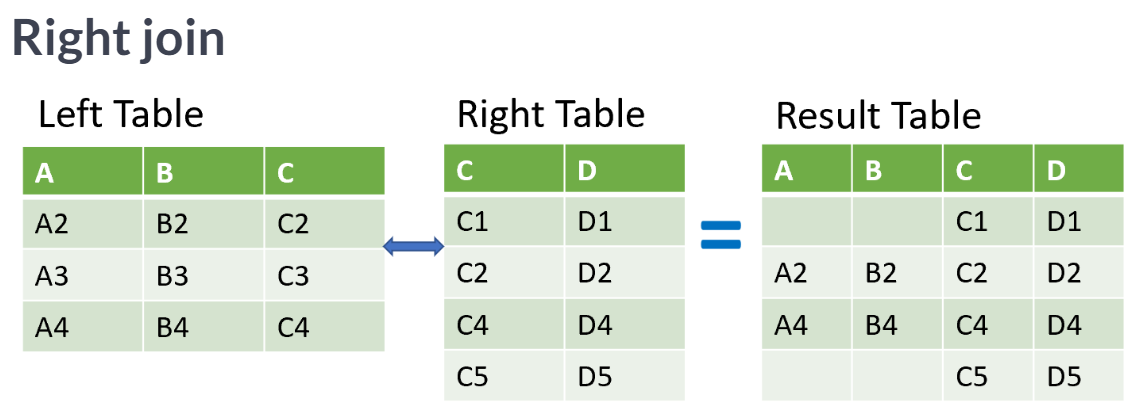

There are multiple genres that each movie can have and to give an example of a right join, the TV Movie genre will be selected to join with the movie dataset with movie as the left table and tv_genre as the right. By using a right now, it will confirm that the movies table is not missing data. Note that the result of the tv_genre data has the column name movie_id and recall that that movie dataset has a column name id. 

##### Merge with Right Joins

Similar to the default .merge() method, the how = argument is now to set right and the on agrument can be modified to left_on= and right_on=. 

In [110]:
#load pickle data file: movie_to_genres.p
with open('movie_to_genres.p', 'rb') as file:
    movie_genre = pickle.load(file)
    
m = movie_genre['genre'] == 'TV Movie'
tv_genre = movie_genre[m]

print(tv_genre)

tvmovies = movies.merge(tv_genre, left_on='id', right_on='movie_id', how='right')
print(tvmovies.head())

       movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie
10835    158150  TV Movie
11096    205321  TV Movie
11282    231617  TV Movie
                       title  popularity release_date  movie_id     genre
0        High School Musical   16.536374   2006-01-20     10947  TV Movie
1  A Charlie Brown Christmas    8.701183   1965-12-09     13187  TV Movie
2         Love's Abiding Joy    1.128559   2006-10-06     22488  TV Movie
3       We Have Your Husband    0.102003   2011-11-12     78814  TV Movie
4                   Restless    0.812776   2012-12-07    153397  TV Movie


#### Outer Joins

An outer join will contain all of the rows of both tables regardless if there is a matching key column. 
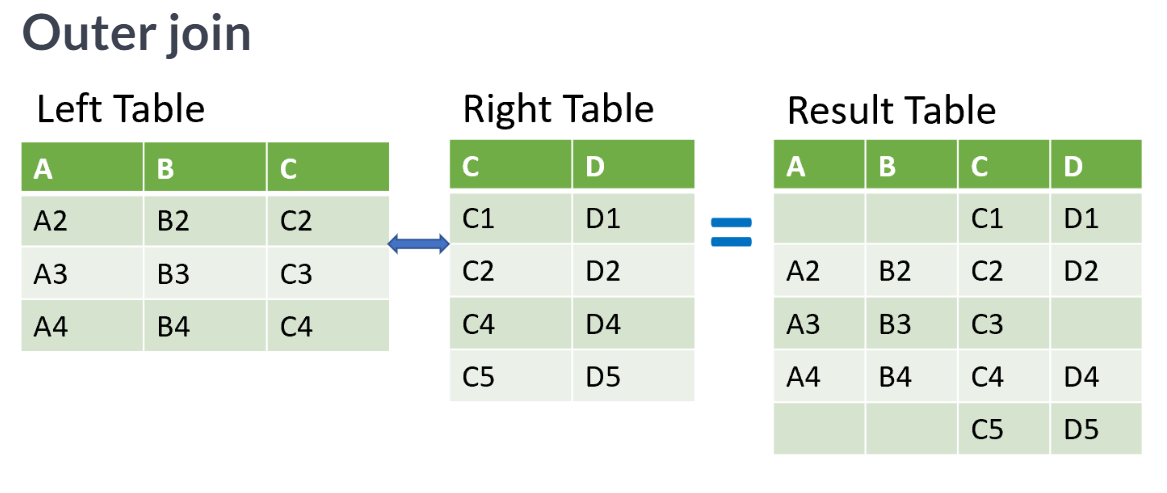

##### Merge with Outer Join
To demonstrate, first filter the genre dataset for 'Family' and 'Comedy'. Then merge the family table on the left with the comedy table on the right and set the on = argument to 'movie_id' and the how = keyword argument to 'outer' and establish the suffixes fam and com respectively. 

The resulting table includes all the rows in the genre dataset that have a genre of Family or Comedy or both and NaNs filled in where it is one but not the other. 

In [111]:
m = movie_genre['genre'] == 'Family'
family = movie_genre[m]
print(family.head(3))

m = movie_genre['genre'] == 'Comedy'
comedy = movie_genre[m]
print(comedy.head(3))

family_comedy = family.merge(comedy, on = 'movie_id', how = 'outer', suffixes = ('_fam', '_com'))
print(family_comedy)

     movie_id   genre
5          12  Family
33         35  Family
111       105  Family
    movie_id   genre
1          5  Comedy
7         13  Comedy
35        35  Comedy
      movie_id genre_fam genre_com
0           12    Family       NaN
1           35    Family    Comedy
2          105    Family    Comedy
3          118    Family    Comedy
4          129    Family       NaN
...        ...       ...       ...
1931    375950       NaN    Comedy
1932    376659       NaN    Comedy
1933    378200       NaN    Comedy
1934    385636       NaN    Comedy
1935    386826       NaN    Comedy

[1936 rows x 3 columns]


### Exercise 2

#### Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The movies, scifi_movies, and action_movies tables have been loaded for you.

__Instructions:__
* Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.
* Update the merge to add suffixes, where 'act' and 'sci' are suffixes with underscores for the left and right tables, respectively.
* From action_scifi, subset only the rows where the genre_act column is null.
* Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.

In [72]:
# Create Datasets needed for this exercise
m = movie_genre['genre'] == 'Science Fiction'
scifi_movies = movie_genre[m]

m = movie_genre['genre'] == 'Action'
action_movies = movie_genre[m]

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how = 'right')

# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how = 'right', suffixes = ('_act', '_sci'))
print(action_scifi.head())

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isna()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction
      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


#### Popular genres with right join
What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movies_to_genres it's called movie_id.

The pop_movies and movie_to_genres tables have been loaded for you.

__Instructions:__
* Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
* Group genres_movies by genre and count the number of id values.

<AxesSubplot:xlabel='genre'>

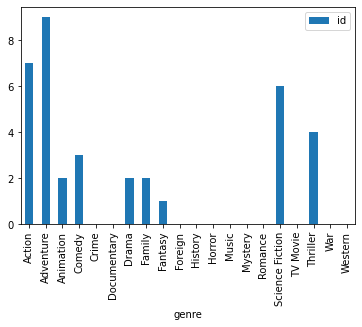

In [80]:
#load data needed for this exercise
pop_movies = pd.read_csv('popmovies.csv')
pd.to_numeric(pop_movies['id'])

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = pop_movies.merge(movie_genre, how='right', left_on = 'id', right_on='movie_id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')

#### Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure.

__Instructions:__
* Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('1','2') with underscores.
* Create an index that returns True if name_1 or name_2 are null, and False otherwise.

In [85]:
#load data needed for this exercise
iron_1_actors = pd.read_csv('iron_1_actors.csv')
iron_2_actors = pd.read_csv('iron_2_actors.csv')

# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on = 'id',how = 'outer', suffixes=('_1', '_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isna()) | 
     (iron_1_and_2['name_2'].isna()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m])

                     character_1       id           name_1  \
0                         Yinsen    17857       Shaun Toub   
2    Obadiah Stane / Iron Monger     1229     Jeff Bridges   
3                    War Machine    18288  Terrence Howard   
5                           Raza    57452      Faran Tahir   
8                     Abu Bakaar   173810    Sayed Badreya   
..                           ...      ...              ...   
185                          NaN    92189              NaN   
186                          NaN  1265840              NaN   
187                          NaN  1265841              NaN   
188                          NaN  1122811              NaN   
189                          NaN  1205141              NaN   

                       character_2                  name_2  
0                              NaN                     NaN  
2                              NaN                     NaN  
3                              NaN                     NaN  
5          

### Merging a Table to Itself

Merging a table to itself is also referred to as a self join. An example of when merging a table with itself is a table of movie sequels. A review of this dataset shows that the sequel column contains movie ID numbers that can be referenced back to the id column. In index 2, Toy Story, the sequel field as the number 863 which is the id for Toy Story 2.
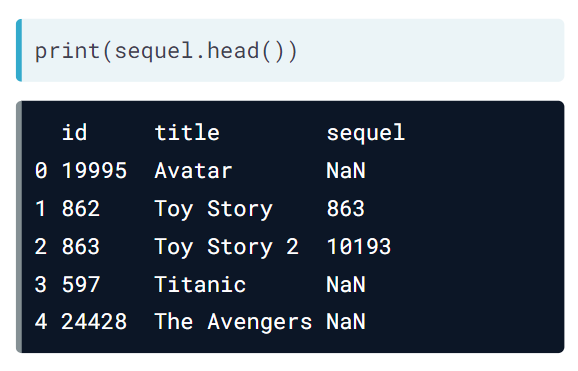

If it was necessary to see a table with the movies and the corresponding sequel information, it would be necessary to merge this table with itself. Merging the table with itself is an inner join,by default, so any rows, like Avatar and Titanic, that don't have sequels are not included. 
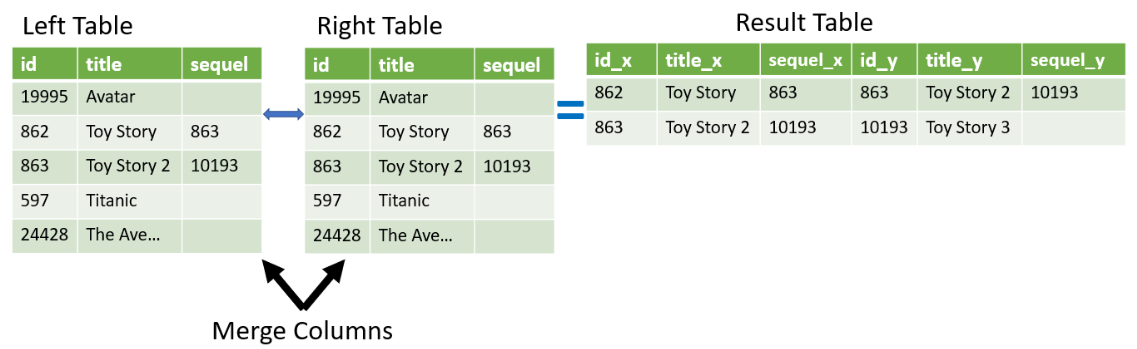

To complete this merger, the sequels table is both set with the .merge() method and provided as the input within the method. Like any merge where the column names are different, right_on= and left_on= keyword arguments are needed and it is best practice to include custom suffixes, using the suffixes= keyword argument. 

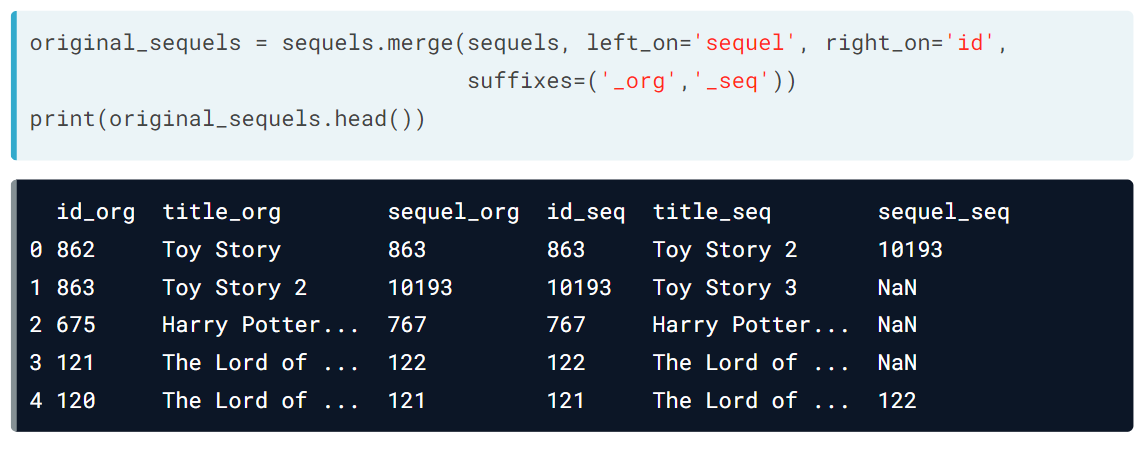

#### Merging a Table to Itself with a Left Join

Like other types of merges, a how= keyword can be used to define a different type of merge other than the default inner join. A Left join of the sequels table on itself will show all of the original movie inputs of the sequel table, even if there is not a corresponding sequel. 

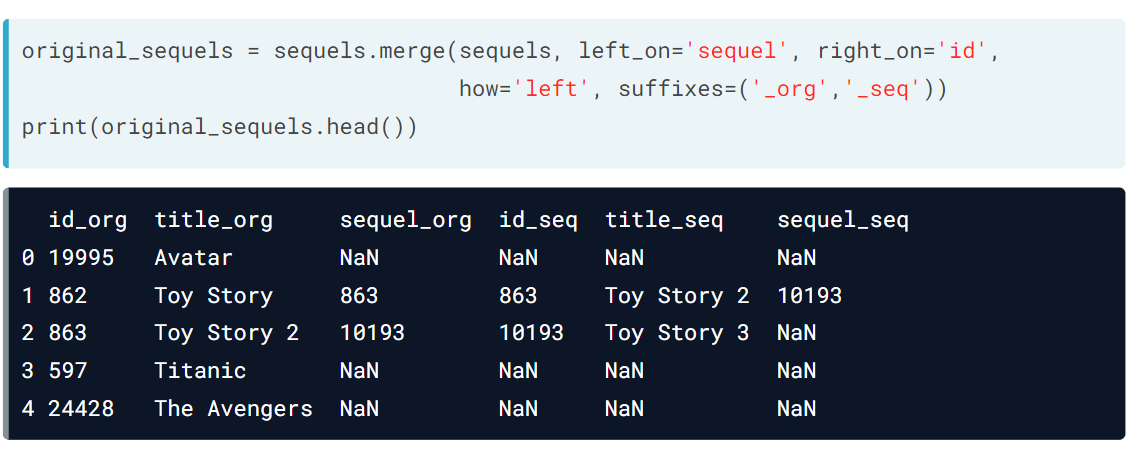

#### When to Merge a Table to Itself

Merging a table to itself may be necessary when the table contains:
> * Hierarchical Relationships - like employee and manager
> * Sequential Relationships - like logistical information
> * Graph Data - such as networks of friends

### Exercise 3

#### Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The crews table has been loaded for you.

__Instructions:__
* To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to 'dir' and 'crew' with underscores for the left and right tables respectively.
* Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.
* Use the .head() method to print the first few rows of direct_crews.

In [92]:
#load data needed for exercise:crews.p
with open('crews.p', 'rb') as file:
    crews = pickle.load(file)

# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on = 'id', suffixes = ('_dir', '_crew'))

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


### Merging on Indexes

Often the DataFrame's index is a unique ID that can be used to merge on. The process is the same, using the .merge() method and providing the on = keyword argument the name of the column to merge on that happens to be the index column.

In [98]:
#Set the ID column to be the index as needed for this example
movies.set_index('id', inplace = True)
taglines.set_index('id', inplace = True)

movies_taglines = movies.merge(taglines, on = 'id', how = 'left')
print(movies_taglines.head())

                      title  popularity release_date  \
id                                                     
257            Oliver Twist   20.415572   2005-09-23   
14290  Better Luck Tomorrow    3.877036   2002-01-12   
38365             Grown Ups   38.864027   2010-06-24   
9672               Infamous    3.680896   2006-11-16   
12819       Alpha and Omega   12.300789   2010-09-17   

                                               tagline  
id                                                      
257                                                NaN  
14290             Never underestimate an overachiever.  
38365  Boys will be boys. . . some longer than others.  
9672           There's more to the story than you know  
12819                           A Pawsome 3D Adventure  


#### Multi-Index Merge

If the tables have multiple indexes, the on = argument is provided a list of the index column names to merge on.
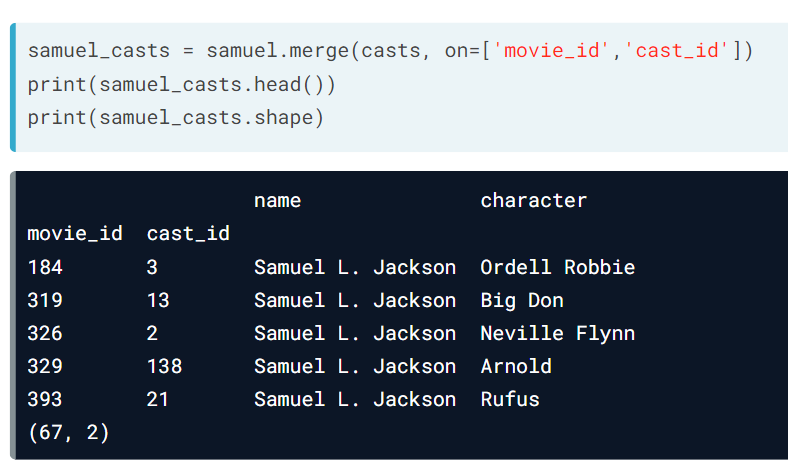

#### Merging with Left_on and Right_on Indexes

When the index column names are not the same, the left_on = and right_on = keyword arguments can be used to specify the columns names to merge on, but since these columns are both index columns, it is necessary to set the left_index = and right_index = keyword arguments to True as well. 

In [103]:
#Set the ID column to be the index as needed for this example
movie_genre.set_index('movie_id', inplace = True)

movies_genres = movies.merge(movie_genre, left_on='id', right_on='movie_id', left_index = True, right_index = True)
print(movies_genres.head())

    id       title  popularity release_date            genre
5    5  Four Rooms   22.876230   1995-12-09            Crime
5    5  Four Rooms   22.876230   1995-12-09           Comedy
11  11   Star Wars  126.393695   1977-05-25  Science Fiction
11  11   Star Wars  126.393695   1977-05-25           Action
11  11   Star Wars  126.393695   1977-05-25        Adventure


### Exercise 4

#### Index merge for movie ratings
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.

The movies and ratings tables have been loaded for you.

__Instructions:__
* Merge movies and ratings on the index and save to a variable called movies_ratings, ensuring that all of the rows from the movies table are returned.

In [106]:
#load data needed for this exercise: ratings.p
with open('ratings.p', 'rb') as file:
    ratings = pickle.load(file)

# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on = 'id')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


#### Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The sequels, and financials tables have been provided for you.

__Instructions:__
* With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.
* Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('org','seq') with the underscores, saving to orig_seq.
* Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.
* Sort by titles_diff by diff in descending order and print the first few rows.

In [205]:
#load data needed for this exercise: sequels.p
sequels = pd.read_csv('sequels.csv', index_col='id')

# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True, suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending = False).head())

               title_org        title_seq          diff
id                                                     
331    Jurassic Park III   Jurassic World  1.144748e+09
272        Batman Begins  The Dark Knight  6.303398e+08
10138         Iron Man 2       Iron Man 3  5.915067e+08
863          Toy Story 2      Toy Story 3  5.696028e+08
10764  Quantum of Solace          Skyfall  5.224703e+08
